<a href="https://colab.research.google.com/github/Aranagut/Tejaswini_INFO5502_Spring2022/blob/main/lab_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets.

# Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

In [18]:
### You code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [2]:
pip install keras

In [3]:
pip install tensorflow

     |████████████████████████████████| 462 kB 5.2 MB/s 


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
### You code here
import pandas as pd

#loading the dataset
data_df = pd.read_csv('/content/drive/MyDrive/portfolio_data.csv')

In [20]:
data_df.head(5)

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


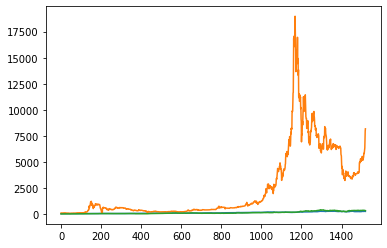

In [35]:
X_df = data.drop(['Date', 'AMZN'], axis = 1)
Y_df = data['AMZN']

plt.plot(X_df)

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X_df, Y_df, test_size = 0.35, random_state = 0)

#LinearRegressoin model
logireg = LinearRegression()
logireg.fit(X_train, y_train)

y_pred = logireg.predict(X_test)

print("Root Mean Square Error score (RMSE) is:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score is:", r2_score(y_test, y_pred))

Root Mean Square Error score (RMSE) is: 75.9549436001661
R2 Score is: 0.9783453724222465


In [37]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size = 0.2, random_state = 0)

#Non-Linear Regression Model ie., Decision Tree Regressor Model
dectree_reg = DecisionTreeRegressor()
dectree_reg.fit(X_train, y_train)

y_pred = dectree_reg.predict(X_test)

print("Root Mean Square Error score (RMSE) is",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score is:", r2_score(y_test, y_pred))

Root Mean Square Error score (RMSE) is 37.7922691463169
R2 Score is: 0.9947226235793358


Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported.

In [1]:
### You code here:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pickle
import nltk


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df1 = pd.read_csv("/content/drive/MyDrive/train.csv")

In [4]:
df1.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
twee_df = df1[df1.label == 1]
twee_df.head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [6]:
normaltwee_df = df1[df1.label == 0]
normaltwee_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = stopwords.words("english")
stopwords = [re.sub('[^a-zA-Z0-9]+', '', word) for word in stopwords]

# removing all special characters
df1['cleared_tweets'] = df1['tweet'].str.replace('[^a-zA-Z0-9 ]', '')
df1['cleared_tweets'] = df1['cleared_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
wordnet_lemm = WordNetLemmatizer()

#lemmatization on the tweets
df1['cleared_tweets'] = df1['cleared_tweets'].apply(lambda row: " ".join(wordnet_lemm.lemmatize(word, pos="v") for word in row.split()))

df1['cleared_tweets'] = df1['cleared_tweets'].apply(lambda row: " ".join(wordnet_lemm.lemmatize(word, pos="n") for word in row.split()))

df1['cleared_tweets'] = df1['cleared_tweets'].apply(lambda row: " ".join(wordnet_lemm.lemmatize(word, pos="a") for word in row.split()))

df1['cleared_tweets'] = df1['cleared_tweets'].apply(lambda row: " ".join(wordnet_lemm.lemmatize(word, pos="r") for word in row.split()))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
from sklearn.linear_model import LogisticRegression
X = df1['cleared_tweets']
Y = df1['label']

vectorizer = TfidfVectorizer(min_df = 3, ngram_range=(1, 2))
vectorizer = vectorizer.fit(X)
X_features = vectorizer.transform(X).toarray()
X_train, X_test, y_train, y_test = train_test_split(X_features, Y, test_size=0.2)

#logistic regression
lenreg = LogisticRegression()
model = lenreg.fit(X_train, y_train)

In [10]:
print(X_features.shape)

(31962, 17047)


In [12]:
df2 = pd.read_csv("/content/drive/MyDrive/test.csv")

df2['cleared_tweets'] = df2['tweet'].str.replace('[^a-zA-Z0-9 ]', '')
df2['cleared_tweets'] = df2['cleared_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

df2['cleared_tweets'] = df2['cleared_tweets'].apply(lambda row: " ".join(wordnet_lemm.lemmatize(word, pos="v") for word in row.split()))

df2['cleared_tweets'] = df2['cleared_tweets'].apply(lambda row: " ".join(wordnet_lemm.lemmatize(word, pos="n") for word in row.split()))

df2['cleared_tweets'] = df2['cleared_tweets'].apply(lambda row: " ".join(wordnet_lemm.lemmatize(word, pos="a") for word in row.split()))

df2['cleared_tweets'] = df2['cleared_tweets'].apply(lambda row: " ".join(wordnet_lemm.lemmatize(word, pos="r") for word in row.split()))

testdf_features = vectorizer.transform(df2['cleared_tweets'])
print(testdf_features.shape)

testdf_pred = model.predict(testdf_features)
print(testdf_pred)

(17197, 17047)
[0 0 0 ... 0 0 0]


In [15]:
print("Confusion matrix is:")
print(confusion_matrix(y_test, model.predict(X_test)))

print("Classification report is:")
print(classification_report(y_test, model.predict(X_test)))

Confusion matrix is:
[[5936    6]
 [ 311  140]]
Classification report is:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5942
           1       0.96      0.31      0.47       451

    accuracy                           0.95      6393
   macro avg       0.95      0.65      0.72      6393
weighted avg       0.95      0.95      0.94      6393

